## Analysing and features extraction using bioSequence

In [1]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [3]:
my_seq = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

In [4]:
analysed_seq = ProteinAnalysis(my_seq) # make sure that the data is really protain sequence
analysed_seq.molecular_weight() #get molecular weight

17103.1617

In [82]:
#analysed_seq.gravy()# get gravity

In [81]:
#analysed_seq.count_amino_acids() # count the number of amino acids

In [86]:
analysed_seq.molar_extinction_coefficient()

(17420, 17545)

In [3]:

seq1 = 'GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGAACCACCCAGGCATTGTGGGGCTGCCCTGCCACCTGCTGGCCGCTCCTGGTGGCAG'
seq2 = 'GCACTACTACACCCATTGCTGTAATAGTAAGTGCCGGTGCCTTCACGCCCTCTAGTGGTCAGTCCTGGGAAATACACACTCACACTTGTGTACTGTTACCC'
anl1 = ProteinAnalysis(seq1)
anl2 = ProteinAnalysis(seq2)

In [4]:
anl1

0.8039603960396032

In [134]:
#anl2.amino_acids_content

# The given data

In [136]:
import pandas as pd
import numpy as np

In [137]:
train_features = pd.read_csv('./data/Xtr.csv')
train_labels = pd.read_csv('./data/Ytr.csv')

In [138]:
modified_train_features = train_features
cols = ['molecular_weight','gravity','iso_electric_point',
        'instability_index','molar_extinction_coefficient',
       'secondary_structure_fraction']
for name in cols:
    modified_train_features[name] = None

In [139]:
for ind in range(len(modified_train_features)):
    seq = train_features.iloc[ind]['seq']
    seq = ProteinAnalysis(seq)
    modified_train_features[cols[0]][ind] = seq.molecular_weight()
    modified_train_features[cols[1]][ind] = seq.gravy()
    modified_train_features[cols[2]][ind] = seq.isoelectric_point()
    modified_train_features[cols[3]][ind] = seq.instability_index()
    modified_train_features[cols[4]][ind] = np.mean(seq.molar_extinction_coefficient())
    modified_train_features[cols[5]][ind] = np.mean(seq.secondary_structure_fraction())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/dist-packages/ipykernel_launch

In [142]:
X = modified_train_features.drop(['seq'], axis = 1) 

In [149]:
X = X.drop(['Id'],axis = 1)

In [153]:
y = train_labels.drop(['Id'],axis = 1)

## Visualization

In [189]:
import seaborn as sns
from matplotlib import pyplot as plt
import pylab as pl


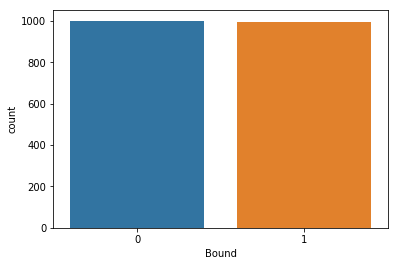

In [190]:
sns.countplot(y['Bound'],label="Lebels Count")
plt.show()

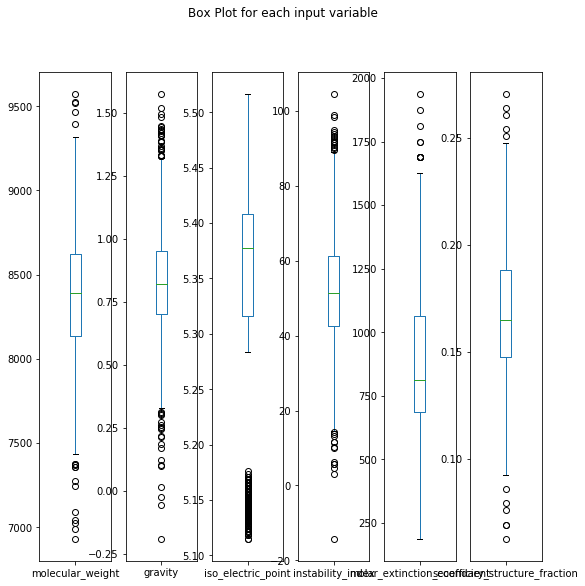

In [187]:
X.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
#plt.savefig('protein_features')
plt.show()

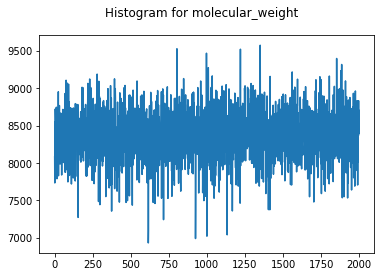

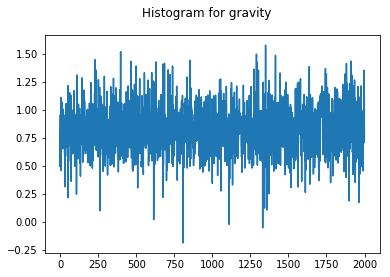

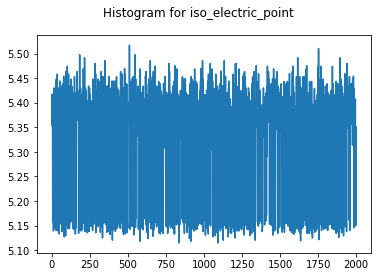

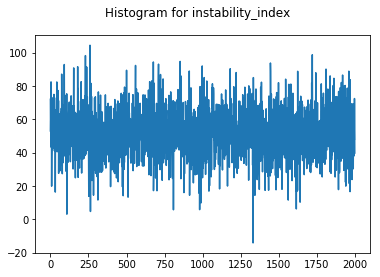

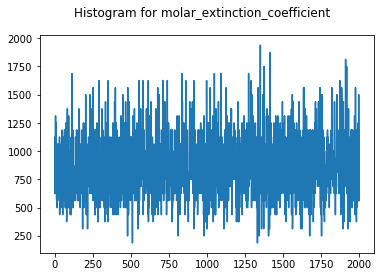

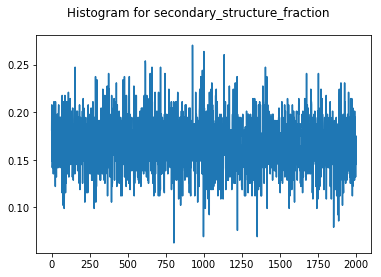

In [201]:
for n in cols:
    X[n].plot()
    #X.hist(bins=30, figsize=(9,9))
    pl.suptitle("Histogram for "+n)
    #plt.savefig('protain_feature_hist')
    plt.show()

In [159]:
import sklearn
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,shuffle = True)

In [163]:
lam = 0.1


# Python solver
alpha = 2 * lam * X.shape[0]
model = lm.LogisticRegression(C=1/alpha, fit_intercept=True)
beta2 = model.fit(X_train, y_train).coef_

# Check
print( beta2)

[[-5.74320555e-06  2.50773948e-03 -3.55649334e-03 -6.88497952e-03
   4.51786344e-04 -1.52997940e-03]]


/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
clf.score(X_train, y_train)

0.5221428571428571

In [168]:
pred = clf.predict(X_test)

In [171]:
from sklearn.metrics import accuracy_score, roc_auc_score

print('Accuracy: {:.2%}'.format(accuracy_score(y_test, pred)))

Accuracy: 47.33%


In [170]:
pred2 = clf.predict(X_train)

In [172]:
print('Accuracy: {:.2%}'.format(accuracy_score(y_train, pred2)))

Accuracy: 52.21%


In [180]:
X.plot()

,molecular_weight,gravity,iso_electric_point,instability_index,molar_extinction_coefficient,secondary_structure_fraction
0,8082.26,0.80396,5.37079,72.0139,1000,0.181518
1,7733.43,0.491089,5.41681,52.6327,625,0.207921
2,8547.01,0.954455,5.35406,59.2376,1125,0.148515
3,7903.83,0.684158,5.39642,56.8149,750,0.19802
4,8721.07,0.910891,5.37421,82.4594,937.5,0.141914
5,8601.26,1.1099,5.33868,65.9059,1312.5,0.145215
6,8218.01,0.458416,5.15692,43.1693,625,0.171617
7,8456.82,1.02871,5.37079,54.3584,1000,0.165017
8,8216.71,1.02673,5.34467,19.8782,1250,0.171617
9,8368.58,0.834653,5.39972,37.8158,937.5,0.165017
